In [3]:

import numpy as np
import librosa
from scipy.signal import lfilter
from scipy.linalg import levinson_durbin



ImportError: cannot import name 'levinson_durbin' from 'scipy.linalg' (/home/ailab/anaconda3/lib/python3.10/site-packages/scipy/linalg/__init__.py)

In [1]:

# Function to compute LPC coefficients for a single frame
def compute_lpc(frame, lpc_order):
    # Compute autocorrelation coefficients
    r = np.correlate(frame, frame, mode='full')
    r = r[len(frame)-1:]
    
    # Levinson-Durbin recursion
    lpc_coef, _, _ = levinson_durbin(r, lpc_order)
    
    return lpc_coef

# Load the audio file
audio_file = 'path/to/your/audio/file.wav'
y, sr = librosa.load(audio_file, sr=None)

# Frame parameters
frame_size = int(0.03 * sr)  # 30 ms frame size
hop_size = int(0.01 * sr)    # 10 ms hop size

# Frame blocking and windowing
frames = librosa.util.frame(y, frame_length=frame_size, hop_length=hop_size, axis=0)
frames *= np.hamming(frame_size)[:, np.newaxis]

# LPC Analysis
lpc_order = 12  # Example LPC order
lpc_coeffs = []
for frame in frames.T:
    lpc_coef = compute_lpc(frame, lpc_order)
    lpc_coeffs.append(lpc_coef)

lpc_coeffs = np.array(lpc_coeffs)

# Feature extraction (you can choose which LPC coefficients to use)
features = lpc_coeffs[:, 1:]  # Exclude the first coefficient (always 1)

# Example: Print the first 5 frames' LPC coefficients
print("LPC Coefficients:")
print(features[:5])



ImportError: cannot import name 'levinson' from 'scipy.linalg' (/home/ailab/anaconda3/lib/python3.10/site-packages/scipy/linalg/__init__.py)

In [4]:
pip install --upgrade scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 2.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.0
    Uninstalling scipy-1.10.0:
      Successfully uninstalled scipy-1.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import librosa
from scipy.signal import lfilter
from scipy.linalg import levinson_durbin

ImportError: cannot import name 'levinson_durbin' from 'scipy.linalg' (/home/ailab/anaconda3/lib/python3.10/site-packages/scipy/linalg/__init__.py)

In [6]:
import numpy as np
import librosa

In [7]:
def levinson_durbin(r, order):
    a = np.zeros(order + 1)
    b = np.zeros(order + 1)
    k = np.zeros(order)
    
    a[0] = 1.0
    b[0] = 1.0
    
    for i in range(order):
        alpha = -np.dot(a[:i+1], r[i::-1]) / np.dot(a[:i+1], r[:i+1])
        a[i+1] = alpha
        k[i] = alpha
        for j in range((i+1)//2):
            temp = a[j]
            a[j] += alpha * np.conj(a[i-j])
            a[i-j] += alpha * np.conj(temp)
    
    return a, k

# Load the audio file
audio_file = '/home/ailab/Downloads/file_example_MP3_700KB.mp3'
y, sr = librosa.load(audio_file, sr=None)

# Frame parameters
frame_size = int(0.03 * sr)  # 30 ms frame size
hop_size = int(0.01 * sr)    # 10 ms hop size

# Frame blocking and windowing
frames = librosa.util.frame(y, frame_length=frame_size, hop_length=hop_size, axis=0)
frames *= np.hamming(frame_size)[:, np.newaxis]

# LPC Analysis
lpc_order = 12  # Example LPC order
lpc_coeffs = []
for frame in frames.T:
    # Compute autocorrelation coefficients
    r = np.correlate(frame, frame, mode='full')
    r = r[len(frame)-1:]

    # Custom Levinson-Durbin recursion
    lpc_coef, _ = levinson_durbin(r, lpc_order)
    lpc_coeffs.append(lpc_coef)

lpc_coeffs = np.array(lpc_coeffs)

# Feature extraction (you can choose which LPC coefficients to use)
features = lpc_coeffs[:, 1:]  # Exclude the first coefficient (always 1)

# Example: Print the first 5 frames' LPC coefficients
print("LPC Coefficients:")
print(features[:5])

ValueError: output array is read-only

In [16]:
import numpy as np
import librosa

# Custom implementation of the Levinson-Durbin recursion algorithm
def levinson_durbin(r, order):
    a = np.zeros(order + 1)
    b = np.zeros(order + 1)
    k = np.zeros(order)
    
    a[0] = 1.0
    b[0] = 1.0
    
    for i in range(order):
        alpha = -np.dot(a[:i+1], r[i::-1]) / np.dot(a[:i+1], r[:i+1])
        a[i+1] = alpha
        k[i] = alpha
        for j in range((i+1)//2):
            temp = a[j]
            a[j] += alpha * np.conj(a[i-j])
            a[i-j] += alpha * np.conj(temp)
    
    return a, k

# Load the audio file
audio_file = '/home/ailab/Downloads/file_example_MP3_700KB.wav'
y, sr = librosa.load(audio_file, sr=None)

# Frame parameters
frame_size = int(0.03 * sr)  # 30 ms frame size
hop_size = int(0.01 * sr)    # 10 ms hop size

# Frame blocking and windowing
frames = librosa.util.frame(y, frame_length=frame_size, hop_length=hop_size, axis=0)
hamming_window = np.hamming(frame_size)

# Ensure data type compatibility
frames = frames.astype(np.float64)

# Apply Hamming window to frames
frames *= hamming_window[:, np.newaxis].T

# LPC Analysis
lpc_order = 12  # Example LPC order
lpc_coeffs = []
for frame in frames.T:
    # Compute autocorrelation coefficients directly
    r = np.correlate(frame, frame, mode='full')
    r = r[len(frame)-1:]
    
    # Custom Levinson-Durbin recursion
    lpc_coef, _ = levinson_durbin(r, lpc_order)
    lpc_coeffs.append(lpc_coef.copy())  # Ensure array is writable by making a copy

lpc_coeffs = np.array(lpc_coeffs)

# Feature extraction (you can choose which LPC coefficients to use)
features = lpc_coeffs[:, 1:]  # Exclude the first coefficient (always 1)

# Example: Print the first 5 frames' LPC coefficients
print("LPC Coefficients:")
print(features[:5])





LPC Coefficients:
[[-8.47931157e+00  7.08857350e+01 -1.06362611e+01 -3.19403380e+02
  -1.55785530e+02  3.49436907e+02 -2.28124666e+02  2.79962234e+02
  -1.62580865e+01 -2.14931943e+01  6.94777182e+00 -4.37242141e-01]
 [-2.80900294e+00  6.76432675e+01 -2.60411985e+01 -9.38877730e+01
  -6.70533910e+01  2.58962126e+02 -1.07711140e+02  1.64521319e+02
  -2.51238152e+00 -1.20068618e+01  3.17701072e+00 -9.24940959e-02]
 [ 1.29841626e+00  1.07038857e+02 -7.33445112e+01 -8.70010748e+01
  -1.35501658e+02  3.33883060e+02 -1.29235794e+02  2.30734895e+02
  -1.20141129e+01 -1.47545827e+01  3.42777635e+00 -1.71205515e-01]
 [ 3.60080559e+01  5.35963727e+02 -5.96334946e+02 -4.66247322e+02
  -8.63028819e+02  1.38980765e+03 -5.20700214e+02  1.18843862e+03
  -1.46536473e+02 -6.74485903e+01  1.16701864e+01 -3.52564017e-01]
 [-1.54983088e+01 -1.26008845e+02  1.97922104e+02  1.26960558e+02
   2.28149181e+02 -2.76459216e+02  7.52456201e+01 -2.97195244e+02
   5.28776411e+01  1.57419037e+01  6.65627868e-02 -5.1

In [23]:
import numpy as np
import librosa

# Custom implementation of the Levinson-Durbin recursion algorithm for LPCC
def levinson_durbin_lpcc(r, order):
    a = np.zeros(order + 1)
    b = np.zeros(order + 1)
    k = np.zeros(order)
    
    a[0] = 1.0
    b[0] = 1.0
    
    for i in range(order):
        alpha = -np.dot(a[:i+1], r[i::-1]) / np.dot(a[:i+1], r[:i+1])
        a[i+1] = alpha
        k[i] = alpha
        for j in range((i+1)//2):
            temp = a[j]
            a[j] += alpha * np.conj(a[i-j])
            a[i-j] += alpha * np.conj(temp)
    
    # Compute LPCC coefficients
    lpcc = -np.log(np.abs(np.fft.fft(a)[:order+1]))
    
    return lpcc

# Load the audio file
audio_file = '/home/ailab/Downloads/file_example_MP3_700KB.wav'
y, sr = librosa.load(audio_file, sr=None)

# Frame parameters
frame_size = int(0.03 * sr)  # 30 ms frame size
hop_size = int(0.01 * sr)    # 10 ms hop size

# Frame blocking
frames = librosa.util.frame(y, frame_length=frame_size, hop_length=hop_size, axis=0)

# Apply Hamming window to frames using np.multiply
hamming_window = np.hamming(frame_size)
hamming_window_reshaped = hamming_window[:, np.newaxis]  # Reshape for broadcasting
frames = frames * hamming_window_reshaped.T

# LPCC Analysis
lpcc_order = 12  # Example LPCC order
lpcc_coeffs = []
for frame in frames.T:
    # Compute autocorrelation coefficients
    r = np.correlate(frame, frame, mode='full')
    r = r[len(frame)-1:]
    
    # Custom Levinson-Durbin recursion for LPCC
    lpcc_coef = levinson_durbin_lpcc(r, lpcc_order)
    lpcc_coeffs.append(lpcc_coef.copy())  # Ensure array is writable by making a copy

lpcc_coeffs = np.array(lpcc_coeffs)

# Feature extraction (you can choose which LPCC coefficients to use)
features = lpcc_coeffs[:, 1:]  # Exclude the first coefficient (always 1)

# Example: Print the first 5 frames' LPCC coefficients
print("LPCC Coefficients:")
print(features[:5])





LPCC Coefficients:
[[-5.93965217 -6.32672521 -6.03865788 -6.6184467  -6.7434629  -6.64062461
  -6.64062461 -6.7434629  -6.6184467  -6.03865788 -6.32672521 -5.93965217]
 [-5.26537743 -5.64864369 -5.46529372 -5.97041217 -6.01691214 -6.30181218
  -6.30181218 -6.01691214 -5.97041217 -5.46529372 -5.64864369 -5.26537743]
 [-5.54750843 -6.03347245 -5.68814875 -6.07937972 -6.16409005 -6.72393475
  -6.72393475 -6.16409005 -6.07937972 -5.68814875 -6.03347245 -5.54750843]
 [-7.26375542 -7.80397165 -7.23112752 -7.46083914 -7.5476404  -8.336909
  -8.336909   -7.5476404  -7.46083914 -7.23112752 -7.80397165 -7.26375542]
 [-6.04733357 -6.54457896 -5.77609979 -5.84997862 -5.79420161 -6.87412703
  -6.87412703 -5.79420161 -5.84997862 -5.77609979 -6.54457896 -6.04733357]]


In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import os
import numpy as np


In [2]:
import librosa

In [4]:
audio,sr = librosa.load("/home/ailab/Downloads/file_example_MP3_700KB.wav")

In [5]:
sr

22050

In [6]:
import numpy as np
def feature_extraction(file_path):
    # load the audio file
    x, sample_rate = librosa.load(file_path)
    # extract features from the audio
    mfcc = librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=50)
    
    return mfcc

In [8]:
mfcc = feature_extraction("/home/ailab/Downloads/file_example_MP3_700KB.wav")
print(mfcc)

[[-4.8168088e+02 -4.5924454e+02 -5.0884183e+02 ... -5.8409399e+02
  -5.9272345e+02 -6.0102667e+02]
 [ 1.5445340e+02  1.7366180e+02  1.3161893e+02 ...  4.0158585e+01
   2.8546543e+01  1.6981178e+01]
 [ 8.8023407e+01  8.8106987e+01  9.3403580e+01 ...  3.7625069e+01
   2.7614100e+01  1.6568253e+01]
 ...
 [ 2.0005348e-01  7.4426597e-01  1.6369913e+00 ... -9.6153831e-01
  -5.6793308e-01 -1.5717874e+00]
 [ 4.0173006e-01  1.2138340e+00  2.7065539e+00 ... -9.6681142e-01
  -5.1631987e-01 -1.3980287e+00]
 [ 5.3407562e-01  1.6979836e+00  3.5089302e+00 ... -9.6245390e-01
  -4.7597343e-01 -1.1812155e+00]]


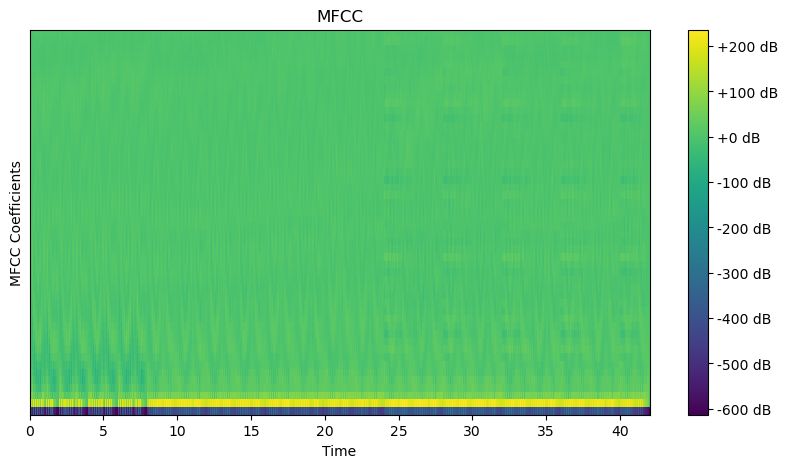

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
librosa.display.specshow(mfcc,x_axis='time',cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()